In [2]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

data = pd.read_csv("Crime_Data_from_2010_to_Present.csv")

In [3]:
#Data Transformations
s_mapping = {"M":0, "F":1, "H":2, "X":3,"-":np.NaN}
d_mapping = {"A":1,"B":2,"C":3,"D":4,"F":6,"G":7,"H":8,"I":9,"J":10,"K":11,"L":12,"O":15,"P":16,"S":19,"U":21,"V":22,"W":23,"X":24,"Z":26,"-":np.NaN}
data = data.replace({'Victim Sex': s_mapping})
data = data.replace({'Victim Descent':d_mapping})
data['Date Reported'] = pd.to_datetime(data['Date Reported'],yearfirst=True)
data['Date Occurred'] = pd.to_datetime(data['Date Occurred'],yearfirst=True)

In [24]:
#Get rid of null values for specified columns
data = data.dropna(axis=0,
                   subset=["Victim Age","Victim Sex","Victim Descent","Area ID","Weapon Used Code"])
print(data.shape)
data.dtypes

(529253, 27)


index                              int64
DR Number                          int64
Date Reported             datetime64[ns]
Date Occurred             datetime64[ns]
Time Occurred                      int64
Area ID                            int64
Area Name                         object
Reporting District                 int64
Crime Code                         int64
Crime Code Description            object
MO Codes                          object
Victim Age                       float64
Victim Sex                       float64
Victim Descent                   float64
Premise Code                     float64
Premise Description               object
Weapon Used Code                 float64
Weapon Description                object
Status Code                       object
Status Description                object
Crime Code 1                     float64
Crime Code 2                     float64
Crime Code 3                     float64
Crime Code 4                     float64
Address         

In [6]:
#group Crime Codes as Property (0) or Violent (1)
crime_mapping = {}
for key in [210,220,310,320,330,331,341,343,345,347, 349,350,351,352,353,354,410,420,421, 432,433,434,439,440,441,442,443,444, 445,446,450,451,452,453, 470,471, 472, 473,474,475,480,485,487,510,520,649,651, 652,653, 654, 660,661,662,664,666,668,670,740,745,760,814,822,888,890,900,903, 906,921,924,926,942,944,946, 948,949,950,951,954]:
    crime_mapping[key] = 0
for key in [110,113,121,122,230,231,235,236,237,250,251,435,436,437,438,622,623,624,625,626,627,647,648,753,755,756,761,762,763,805,806,810,812,813,815,820,821,830,840,850,860,865,870,880,882,884,886,901,902,910,920,922,928,930,931,932,933,940,943,952,956]:
    crime_mapping[key] = 1
crime_class = data["Crime Code"].replace(crime_mapping)
crime_class.unique()

array([1, 0])

In [43]:
#consolidate victim, area info into vectors
vict = np.column_stack((data["Victim Age"],data["Victim Sex"],data["Victim Descent"]))
area = np.column_stack((data["Area ID"],data["Reporting District"]))
#area_crime = np.column_stack((data["Area ID"],crime_class))
area_weapon = np.column_stack((data["Area ID"].head(10000),data["Weapon Used Code"].head(10000)))
area_victim = np.column_stack((data["Area ID"].head(10000),data["Victim Age"].head(10000)))
time_weapon = np.column_stack((data["Time Occurred"].head(10000),data["Weapon Used Code"].head(10000)))
weapon_gender = np.column_stack((data["Victim Sex"].head(10000),data["Weapon Used Code"].head(10000)))

In [26]:
#Construct Gaussian Bayes model
from sklearn.naive_bayes import GaussianNB
#area = np.array(data["Area Code"].values).reshape(-1,1)
#a = np.column_stack((data["Victim Age"],data["Victim Sex"]))
#b = data["Crime Code"]
model = GaussianNB()
model.fit(vict,crime_class)

GaussianNB(priors=None)

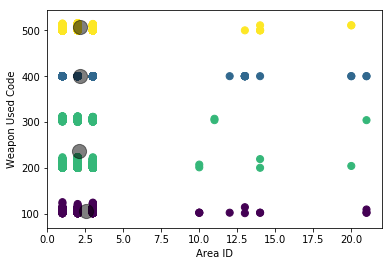

In [52]:
from sklearn.cluster import KMeans
#area = np.array(data["Area Code"].values).reshape(-1,1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(area_weapon)
y_kmeans = kmeans.predict(area_weapon)
plt.xlabel("Area ID")
plt.ylabel("Weapon Used Code")
plt.scatter(area_weapon[:, 0], area_weapon[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

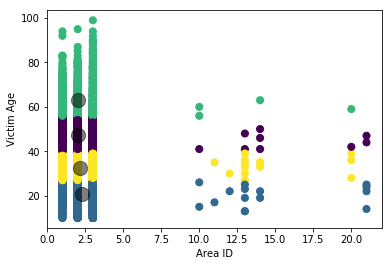

In [51]:
from sklearn.cluster import KMeans
#area = np.array(data["Area Code"].values).reshape(-1,1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(area_victim)
y_kmeans = kmeans.predict(area_victim)
plt.xlabel("Area ID")
plt.ylabel("Victim Age")
plt.scatter(area_victim[:, 0], area_victim[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

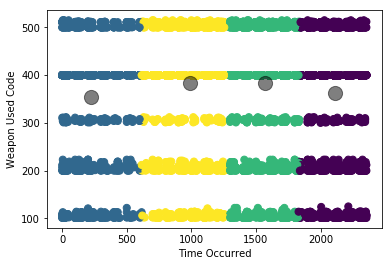

In [53]:
from sklearn.cluster import KMeans
#area = np.array(data["Area Code"].values).reshape(-1,1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(time_weapon)
y_kmeans = kmeans.predict(time_weapon)
#plt.figure(figsize=(20,10))
plt.xlabel("Time Occurred")
plt.ylabel("Weapon Used Code")
plt.scatter(time_weapon[:, 0], time_weapon[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

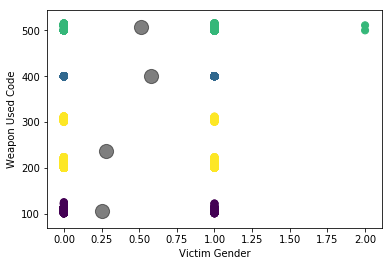

In [54]:
from sklearn.cluster import KMeans
#area = np.array(data["Area Code"].values).reshape(-1,1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(weapon_gender)
y_kmeans = kmeans.predict(weapon_gender)
#plt.figure(figsize=(20,10))
plt.xlabel("Victim Gender")
plt.ylabel("Weapon Used Code")
plt.scatter(weapon_gender[:, 0], weapon_gender[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()